In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyet

In [2]:
meteo = pd.read_csv("data\\hourly.csv", index_col="date_time", parse_dates=True)
meteo.columns

Index(['station_id', 'eto', 'etr', 'rso', 'ea_avg', 'rh_max', 'rh_min',
       'td_avg', 'td_max', 'td_min', 'solarmj', 'airt_avg', 'airt_max',
       'airt_min', 'intt_avg', 'wett_avg', 'windd_sd', 'airt2_avg',
       'battv_min', 'precip_tb', 'timestamp', 'windd_avg', 'winds_avg',
       'winds_max', 'precip_wpg', 'soilt4_avg', 'soilt8_avg', 'solarw_avg',
       'precip_accum', 'soilvwc8_avg', 'wetstate_avg'],
      dtype='object')

In [3]:
lat =  37.8623 * np.pi / 180
LZ = 112.8811
LM = 115
elevation = 1759  #5770 ft.

In [4]:
etos_hour = pyet.pm_asce(meteo["airt_avg"], meteo["winds_avg"], 
                        rs=meteo["solarmj"],
                        ea=meteo["ea_avg"],
                        elevation=elevation, lat=lat, lz=LZ, lon=LM, freq="H",
                        rhmax=meteo["rh_max"], 
                        rhmin=meteo["rh_min"],
                        tmax=meteo["airt_max"], tmin=meteo["airt_min"])
etrs_hour = pyet.pm_asce(meteo["airt_avg"], meteo["winds_avg"], 
                        rs=meteo["solarmj"],
                        ea=meteo["ea_avg"],
                        elevation=elevation, lat=lat, lz=LZ, lon=LM, freq="H",
                        rhmax=meteo["rh_max"], 
                        rhmin=meteo["rh_min"],
                        tmax=meteo["airt_max"], tmin=meteo["airt_min"],
                        etype="rs")

<AxesSubplot:xlabel='date_time'>

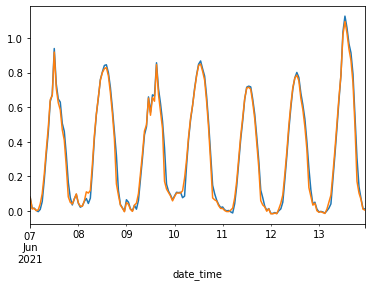

In [6]:
s1,e1 = ("2021-6-7","2021-6-13")
etos_hour[s1:e1].plot()
meteo.loc[s1:e1,"eto"].plot()

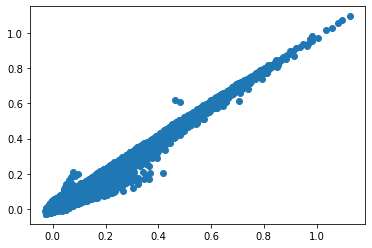

In [7]:
plt.scatter(etos_hour, meteo["eto"])

In [3]:
data = pd.read_csv("data\\hourly_coagmet.csv", index_col="Date", parse_dates=True)
data = data.sort_index()
data.columns


#tmean, rh, wind, rs = [meteo[col] for col in meteo.columns]

In [ ]:
eto_hour = pyet.pm_asce(tmean, wind, rs, elevation=elevation, lat=lat2, freq="H")

In [2]:
meteo = pd.read_csv("data\\hourly_ASCE.csv", index_col="date_time", parse_dates=True)
meteo.columns

Index(['station_id', 'eto', 'etr', 'rso', 'solar', 'ea_avg', 'precip',
       'rh_max', 'rh_min', 'td_avg', 'td_max', 'td_min', 'airt_avg',
       'airt_max', 'airt_min', 'solar_mj', 'windd_avg', 'winds_avg',
       'winds_max', 'precip_accum'],
      dtype='object')

In [3]:
latitude = 38.64787  # 38.64787° N 
lat1=(latitude-int(latitude))*(5./3.)+int(latitude) 
lat2=lat1*np.pi/180
elevation = 1380

In [4]:
eto_hour = pyet.pm_asce(meteo["airt_avg"], meteo["winds_avg"], rs=meteo["solar_mj"], ea=meteo["ea_avg"],
                        elevation=elevation, lat=lat2, rhmax=meteo["rh_max"], rhmin=meteo["rh_min"], tmax=meteo["airt_max"], tmin=meteo["airt_min"], 
                        freq="H")
eto_hour1 = pyet.pm_asce(meteo["airt_avg"], meteo["winds_avg"], rs=meteo["solar_mj"],
                        elevation=elevation, lat=lat2, rh=((meteo["rh_max"]+meteo["rh_min"])/2), tmax=meteo["airt_max"], tmin=meteo["airt_min"], 
                        freq="H")

In [5]:
g = pd.Series(0.1, meteo["solar_mj"].index)
g

date_time
2020-06-01 00:00:00    0.1
2020-06-01 01:00:00    0.1
2020-06-01 02:00:00    0.1
2020-06-01 03:00:00    0.1
2020-06-01 04:00:00    0.1
                      ... 
2020-08-31 20:00:00    0.1
2020-08-31 21:00:00    0.1
2020-08-31 22:00:00    0.1
2020-08-31 23:00:00    0.1
2020-09-01 00:00:00    0.1
Length: 2207, dtype: float64

<AxesSubplot:xlabel='date_time'>

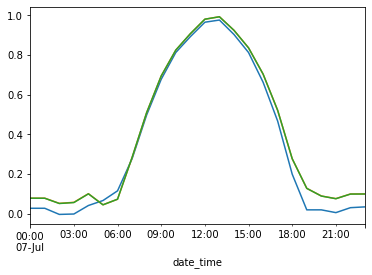

In [6]:
meteo["eto"]["2020-7-7"].plot()
eto_hour["2020-7-7"].plot()
eto_hour1["2020-7-7"].plot()

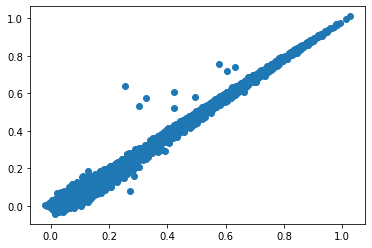

In [7]:
plt.scatter(eto_hour, meteo["eto"])